In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("18-cyber_attack_data.csv")

In [5]:
df.head()

,src_packet_rate,dst_packet_rate,avg_payload_size,connection_duration,tcp_flag_count,avg_interarrival_time,failed_login_attempts,unusual_port_activity_score,session_entropy,avg_response_delay,attack_type
0,-1.286132,-0.648334,1.044115,-0.469715,0.789859,-0.083727,-1.647309,-1.316412,1.011910,-0.898063,2
1,-0.222224,2.083232,1.191114,-1.354527,-0.956992,1.696028,-1.070406,0.981403,-1.628798,1.377594,0
2,-0.431963,0.375745,-1.370334,0.819214,0.345243,1.389447,-1.904130,1.292602,0.925545,0.232705,0
3,-0.912633,0.986988,-0.690042,2.014628,-0.442260,0.590347,-1.819353,1.560938,0.823755,0.517762,0
4,-0.367056,1.667892,0.879172,2.214276,1.846338,-0.894047,1.543838,0.931103,-1.015210,1.061845,1


In [6]:
df.columns

Index(['src_packet_rate', 'dst_packet_rate', 'avg_payload_size',
       'connection_duration', 'tcp_flag_count', 'avg_interarrival_time',
       'failed_login_attempts', 'unusual_port_activity_score',
       'session_entropy', 'avg_response_delay', 'attack_type'],
      dtype='object')

- src_packet_rate -> Source-side packet transmission rate
- dst_packet_rate -> Destination-side packet reception rate
- avg_payload_size -> Average size of payload in packets
- connection_duration -> Duration of the connection (in seconds)
- tcp_flag_count -> Number of TCP flag occurrences
- avg_interarrival_time -> Time between packet arrivals
- failed_login_attempts -> Number of failed login attempts
- unusual_port_activity_score -> Score representing unusual port usage
- session_entropy -> Entropy of session behavior (for anomaly detection)
- avg_response_delay -> Average delay in server response (in ms)
- attack_type -> 0 = Normal, 1 = DDoS, 2 = Port Scan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_packet_rate              1000 non-null   float64
 1   dst_packet_rate              1000 non-null   float64
 2   avg_payload_size             1000 non-null   float64
 3   connection_duration          1000 non-null   float64
 4   tcp_flag_count               1000 non-null   float64
 5   avg_interarrival_time        1000 non-null   float64
 6   failed_login_attempts        1000 non-null   float64
 7   unusual_port_activity_score  1000 non-null   float64
 8   session_entropy              1000 non-null   float64
 9   avg_response_delay           1000 non-null   float64
 10  attack_type                  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


Yine bu eğitim özelinde oluşturulmuş temiz bir data setimiz var. EDA yapmamıza bile gerek yok. Scale da edilmiş. O yüzden direkt olarak model geliştirmeye odaklanacağız. Buradaki hedef değişkenimiz 3 tane türü olan attack_type olacak.

In [8]:
X = df.drop('attack_type', axis = 1)
y = df['attack_type']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=15)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
y_pred

array([2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score : " , score)
print(classification_report(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

Accuracy Score :  0.772
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        90
           1       0.70      0.75      0.72        80
           2       0.74      0.80      0.77        80

    accuracy                           0.77       250
   macro avg       0.78      0.77      0.77       250
weighted avg       0.78      0.77      0.77       250

Confusion Matrix : 
 [[69 16  5]
 [ 2 60 18]
 [ 6 10 64]]


Bu şekilde normal bir Logistic Regression yapabiliriz. Veya aşağıda yapacağım gibi GridSearchCV ile en optimum parametreleri bulmaya çalışabiliriz.

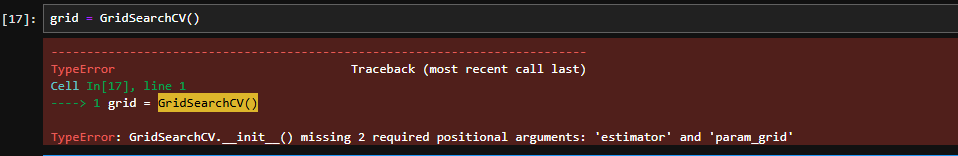

Böyle boş çalıştırınca şekildeki gibi gerekli olan parametreleri istiyor.

In [45]:
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]

In [46]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [48]:
cv = StratifiedKFold()

In [49]:
grid = GridSearchCV(estimator = model, param_grid = params, cv=cv, scoring="accuracy",n_jobs=-1)


In [50]:
grid.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [51]:
grid.best_params_


{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [52]:
grid.best_score_


0.8026666666666668

In [53]:
y_pred = grid.predict(X_test)

In [54]:
score = accuracy_score(y_pred, y_test)
print("score: ", score)
print(classification_report(y_pred, y_test))
print("confusion matrix: \n ", confusion_matrix(y_pred, y_test))

score:  0.768
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        77
           1       0.72      0.70      0.71        83
           2       0.80      0.71      0.75        90

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

confusion matrix: 
  [[70  2  5]
 [14 58 11]
 [ 6 20 64]]


# ONE vs Rest

In [55]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [57]:
onevsonemodel = OneVsOneClassifier(LogisticRegression())
onevsrestmodel = OneVsRestClassifier(LogisticRegression())

In [58]:
onevsonemodel.fit(X_train, y_train)
y_pred = onevsonemodel.predict(X_test)
score = accuracy_score(y_pred, y_test)
print("score: ", score)
print(classification_report(y_pred, y_test))
print("confusion matrix: \n ", confusion_matrix(y_pred, y_test))

score:  0.788
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        78
           1       0.75      0.74      0.75        81
           2       0.82      0.73      0.77        91

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250

confusion matrix: 
  [[71  3  4]
 [11 60 10]
 [ 8 17 66]]


In [59]:
onevsrestmodel.fit(X_train, y_train)
y_pred = onevsrestmodel.predict(X_test)
score = accuracy_score(y_pred, y_test)
print("score: ", score)
print(classification_report(y_pred, y_test))
print("confusion matrix: \n ", confusion_matrix(y_pred, y_test))

score:  0.78
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        78
           1       0.74      0.72      0.73        82
           2       0.82      0.73      0.78        90

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

confusion matrix: 
  [[70  2  6]
 [15 59  8]
 [ 5 19 66]]


One vs One zaten genelde daha iyi sonuç veriyordu bunu öğrenmiştik. Ama uzun sürebilirdi tabi burada sadece 1000 tane row var o yüzden pek problem değil.